# Aadhaar Enrolment Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load The Datasets

In [2]:
df = pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


## Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            500000 non-null  object
 1   state           500000 non-null  object
 2   district        500000 non-null  object
 3   pincode         500000 non-null  int64 
 4   age_0_5         500000 non-null  int64 
 5   age_5_17        500000 non-null  int64 
 6   age_18_greater  500000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 26.7+ MB


In [4]:
df.shape

(500000, 7)

## Creating total enrolment column

In [5]:
df['TotalEnrolment'] = df['age_0_5']+df['age_5_17']+df['age_18_greater']
df[['age_0_5', 'age_5_17', 'age_18_greater', 'TotalEnrolment']].head()

,age_0_5,age_5_17,age_18_greater,TotalEnrolment
0,11,61,37,109
1,14,33,39,86
2,29,82,12,123
3,62,29,15,106
4,14,16,21,51


## Age wise Enrolment

In [6]:
age_df = df[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()
age_df.columns = ['Age Group', 'Total Enrolments']
age_df

,Age Group,Total Enrolments
0,age_0_5,2020406
1,age_5_17,1157841
2,age_18_greater,122779


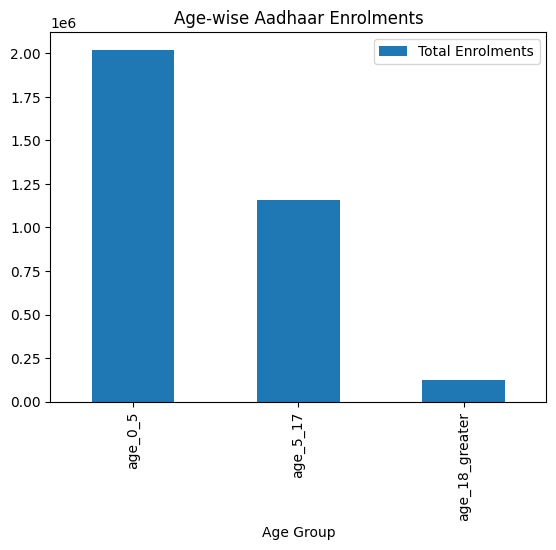

In [7]:
age_df.plot(kind = 'bar', x='Age Group', y='Total Enrolments', title='Age-wise Aadhaar Enrolments')
plt.show()

## State wise Enrolment

In [8]:
state_Enrolment = (df.groupby('state')['TotalEnrolment'].sum().sort_values(ascending=False))

In [9]:
state_Enrolment.head().reset_index()

,state,TotalEnrolment
0,Uttar Pradesh,670426
1,Bihar,390901
2,Madhya Pradesh,277081
3,West Bengal,222260
4,Maharashtra,222030


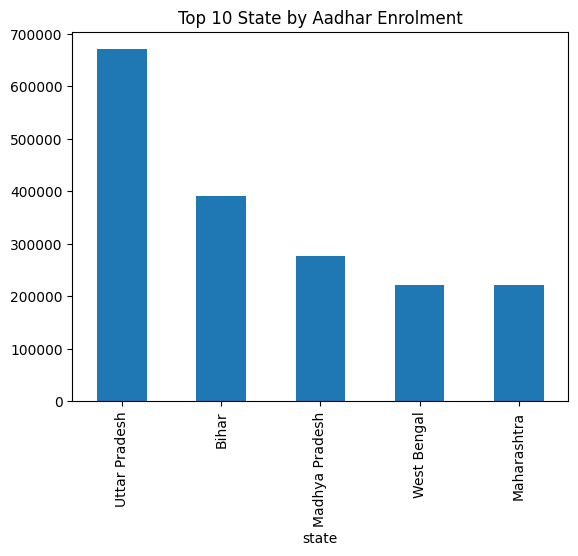

In [75]:
state_Enrolment.head().plot(kind = 'bar', x='TotalEnrolment', y='state', title='Top 10 State by Aadhar Enrolment')
plt.show()

## District wise Enrolment

In [15]:
district_enrolment = df.groupby('district')['TotalEnrolment'].sum().sort_values(ascending=False)

In [16]:
district_enrolment.head().reset_index()

,district,TotalEnrolment
0,Sitamarhi,34278
1,Bahraich,32681
2,Thane,29464
3,East Khasi Hills,25873
4,Sitapur,23140


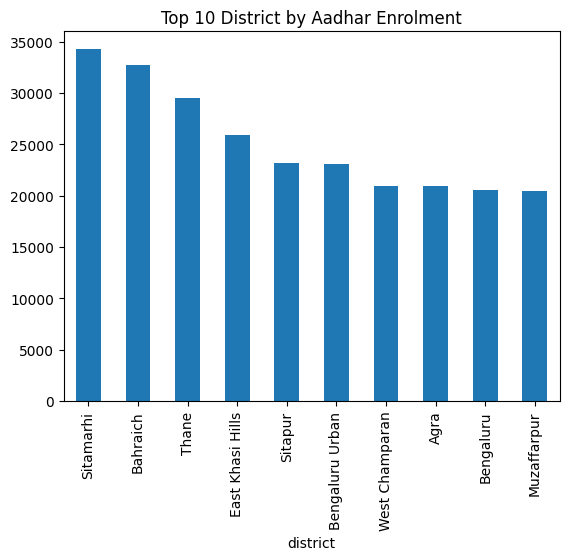

In [77]:
district_enrolment.head(10).plot(kind = 'bar', x='TotalEnrolment', y='district', title='Top 10 District by Aadhar Enrolment')
plt.show()

In [68]:
average_enrolment = district_enrolment.median()

In [69]:
average_enrolment

np.float64(1728.0)

In [70]:
under_enrolment_district = district_enrolment[district_enrolment < average_enrolment]
under_enrolment_district.head(10).reset_index()

,district,TotalEnrolment
0,Chitradurga,1721
1,Tarn Taran,1712
2,Angul,1703
3,Theni,1703
4,Mahisagar,1702
5,Jaisalmer,1693
6,Dhenkanal,1692
7,West Karbi Anglong,1665
8,Kolar,1638
9,Koderma,1635


**These District need Attention**
**and Low Aadhaar enrolment compared to others**

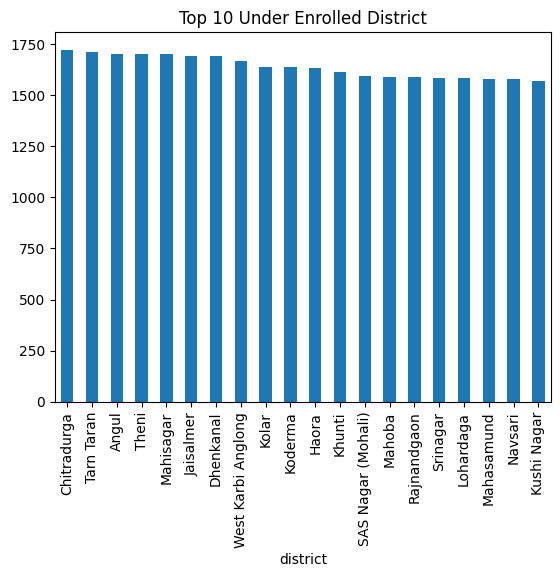

In [85]:
under_enrolment_district.head(20).plot(kind = 'bar', x = 'district', y = 'TotalEnrolment', title='Top 10 Under Enrolled District')
plt.show()

In [105]:
under_enrolled_count = (district_enrolment < average_enrolment).sum()

In [106]:
print("Total Under enrolled Dstrict : ",under_enrolled_count)

Total Under enrolled Dstrict :  485


## Key Insights
- The 0–5 years age group has the highest Aadhaar enrolments, followed by the 5–17 age group.
- Aadhaar enrolments vary widely across states, with Uttar Pradesh contributing the highest number of enrolments.
- 485 districts have enrolments below the average district enrolment.
- Focus more on areas with low enrolment so everyone gets equal Aadhaar coverage.
- Top contributing states are Uttar pradesh and Bihar.